In [2]:
import pandas as pd
import numpy as np
import pycountry_convert as pc

df = pd.read_csv("./ThemeParkAnalysis/data/raw/updated_disneylandreviews.csv")
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)

df['Visit_Type'] = df['Review_Text'].apply(lambda x: 
    'Family' if any(word in x.lower() for word in ['family', 'my kids', 'the kids', 'my children', 'parents', 'wife', 'husband', 'baby', 
                       'toddler', 'son', 'daughter', 'mom', 'dad', 'grandma', 'grandpa', 'grandmother', 'grandfather', 'grandchild', 'grandchildren', 'grandson', 'grandaughter', 
                       'cousins', 'nephew', 'niece', 'the kids', 'little ones', 'family-friendly']) else
    'Couples' if any(word in x.lower() for word in ['boyfriend', 'girlfriend', 'my partner', 'honeymoon', 'fiance', 'fiancee', 'anniversary trip', 'couples retreat' ]) else                                                                                 
    'Friends' if any(word in x.lower() for word in ['friends', 'buddies', 'hangout', 'bestie', 'friend']) else                                                                
    'Solo' if any(word in x.lower() for word in ['solo trip', 'by myself']) else 'Unknown'
)

df = df.drop(columns=['Review_ID', 'Review_Text'])  

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unknown"  

df["Continent"] = df["Reviewer_Location"].apply(country_to_continent)

df_all = df
df_hongkong = df[df['Branch'] == 'Disneyland_HongKong']
df_california = df[df['Branch'] == 'Disneyland_California']
df_paris = df[df['Branch'] == 'Disneyland_Paris']

df.head()

,Rating,Reviewer_Location,Branch,Year,Month,Sentiment,Visit_Type,Continent
0,4,Australia,Disneyland_HongKong,2019,4,0.7069,Unknown,Oceania
1,4,Philippines,Disneyland_HongKong,2019,5,0.9901,Unknown,Asia
2,4,United Arab Emirates,Disneyland_HongKong,2019,4,0.9920,Unknown,Asia
3,4,Australia,Disneyland_HongKong,2019,4,0.8489,Unknown,Oceania
4,4,United Kingdom,Disneyland_HongKong,2019,4,0.2846,Family,Europe


Gaining some insights of the relationships

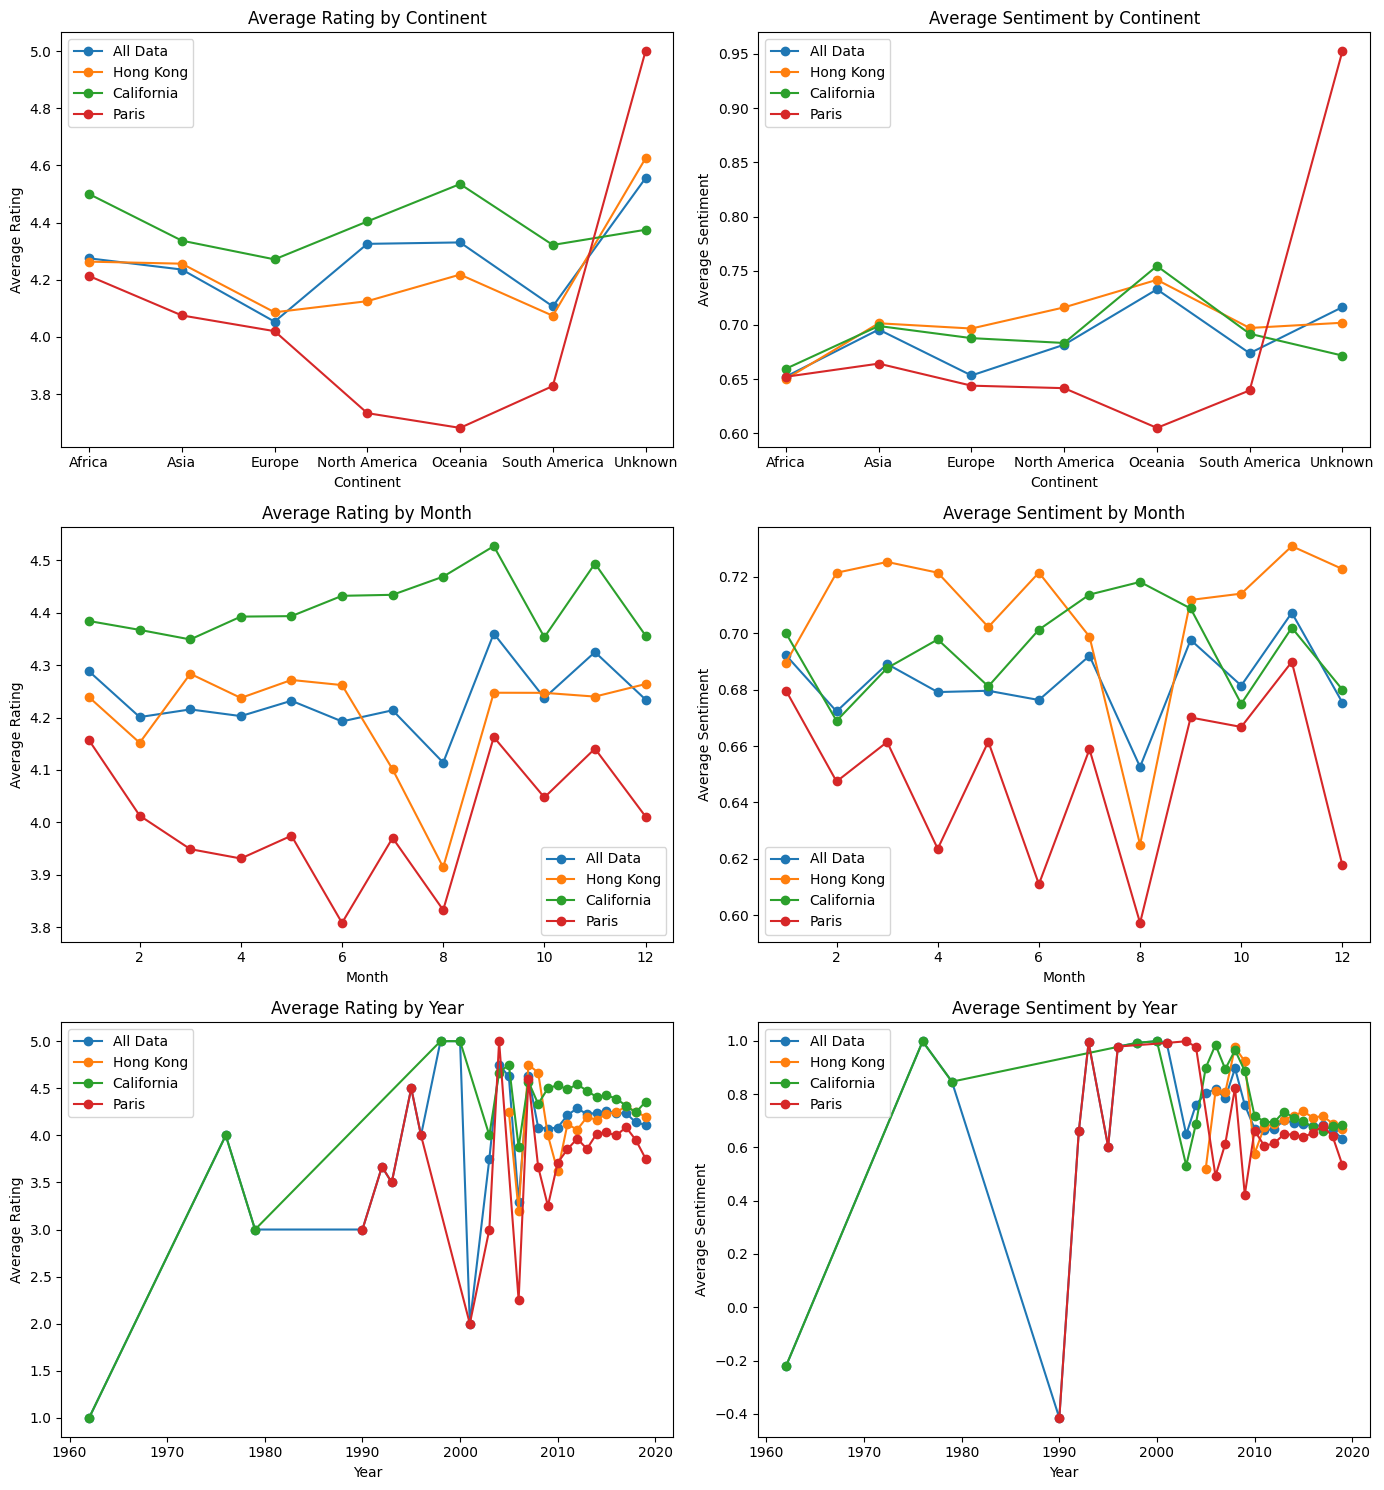

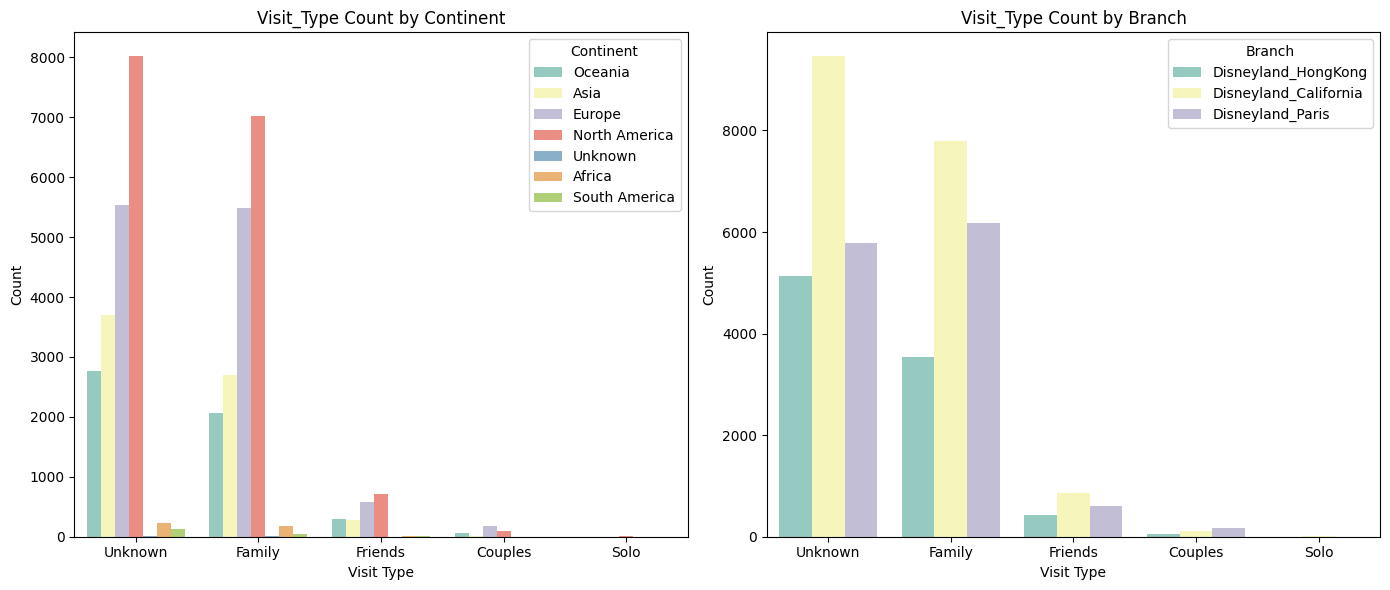

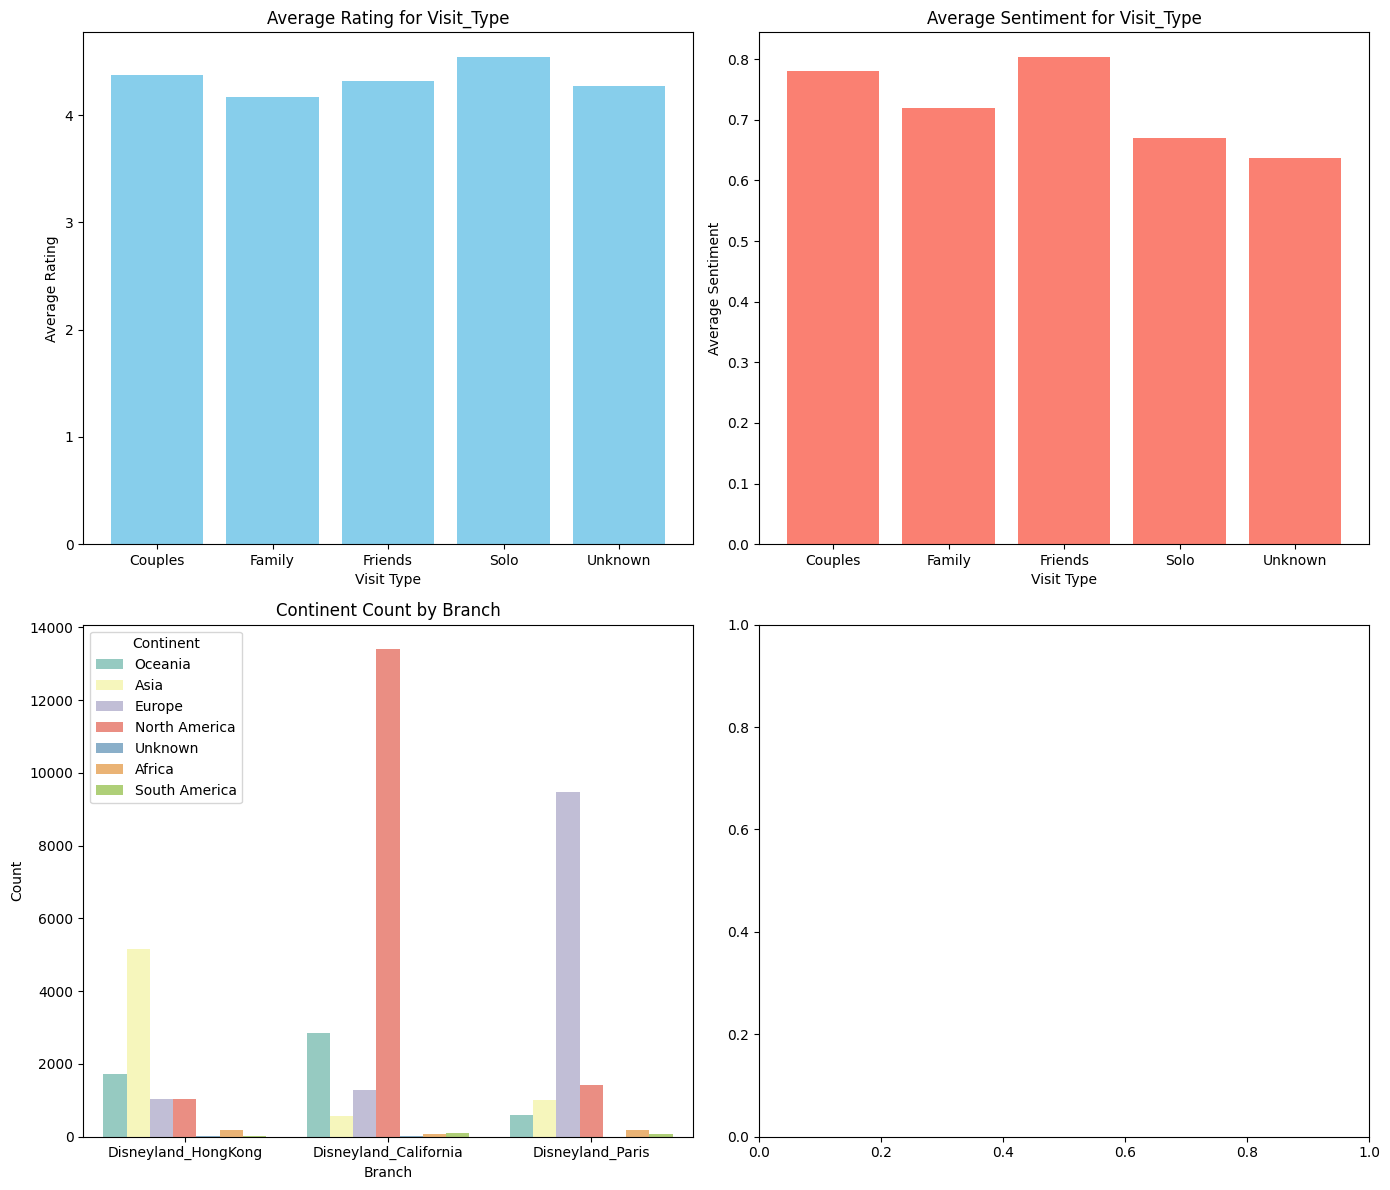

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(3, 2, figsize=(14, 15))

datasets = {
    "All Data": df_all,
    "Hong Kong": df_hongkong,
    "California": df_california,
    "Paris": df_paris
}


# Left: Average Rating by Continent
for name, data in datasets.items():
    axs[0, 0].plot(data.groupby('Continent')['Rating'].mean(), marker='o', label=name)
axs[0, 0].set_title('Average Rating by Continent')
axs[0, 0].set_xlabel('Continent')
axs[0, 0].set_ylabel('Average Rating')
axs[0, 0].legend()

# Right: Average Sentiment by Continent
for name, data in datasets.items():
    axs[0, 1].plot(data.groupby('Continent')['Sentiment'].mean(), marker='o', label=name)
axs[0, 1].set_title('Average Sentiment by Continent')
axs[0, 1].set_xlabel('Continent')
axs[0, 1].set_ylabel('Average Sentiment')
axs[0, 1].legend()


# Left: Average Rating by Month
for name, data in datasets.items():
    axs[1, 0].plot(data.groupby('Month')['Rating'].mean(), marker='o', label=name)
axs[1, 0].set_title('Average Rating by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average Rating')
axs[1, 0].legend()

# Right: Average Sentiment by Month
for name, data in datasets.items():
    axs[1, 1].plot(data.groupby('Month')['Sentiment'].mean(), marker='o', label=name)
axs[1, 1].set_title('Average Sentiment by Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Sentiment')
axs[1, 1].legend()


# Left: Average Rating by Year
for name, data in datasets.items():
    axs[2, 0].plot(data.groupby('Year')['Rating'].mean(), marker='o', label=name)
axs[2, 0].set_title('Average Rating by Year')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Average Rating')
axs[2, 0].legend()

# Right: Average Sentiment by Year
for name, data in datasets.items():
    axs[2, 1].plot(data.groupby('Year')['Sentiment'].mean(), marker='o', label=name)
axs[2, 1].set_title('Average Sentiment by Year')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Average Sentiment')
axs[2, 1].legend()

plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(1, 2, figsize=(14, 6))

# Count Visit_Type by Continent
sns.countplot(x='Visit_Type', hue='Continent', data=df_all, ax=axs2[0], palette="Set3")
axs2[0].set_title('Visit_Type Count by Continent')
axs2[0].set_xlabel('Visit Type')
axs2[0].set_ylabel('Count')

# Count Visit_Type by Branch
sns.countplot(x='Visit_Type', hue='Branch', data=df_all, ax=axs2[1], palette="Set3")
axs2[1].set_title('Visit_Type Count by Branch')
axs2[1].set_xlabel('Visit Type')
axs2[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

fig3, axs3 = plt.subplots(2, 2, figsize=(14, 12))

#Average Rating for Visit_Type
visit_rating = df_all.groupby('Visit_Type')['Rating'].mean()
axs3[0, 0].bar(visit_rating.index, visit_rating.values, color='skyblue')
axs3[0, 0].set_title('Average Rating for Visit_Type')
axs3[0, 0].set_xlabel('Visit Type')
axs3[0, 0].set_ylabel('Average Rating')

#Average Sentiment for Visit_Type
visit_sentiment = df_all.groupby('Visit_Type')['Sentiment'].mean()
axs3[0, 1].bar(visit_sentiment.index, visit_sentiment.values, color='salmon')
axs3[0, 1].set_title('Average Sentiment for Visit_Type')
axs3[0, 1].set_xlabel('Visit Type')
axs3[0, 1].set_ylabel('Average Sentiment')

#Continent Count by Branch
sns.countplot(x='Branch', hue='Continent', data=df_all, ax=axs3[1, 0], palette="Set3")
axs3[1, 0].set_title('Continent Count by Branch')
axs3[1, 0].set_xlabel('Branch')
axs3[1, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()


DBSCAN

C:\Users\angsp\AppData\Local\Temp\ipykernel_3796\2320077402.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_3796\2320077402.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")


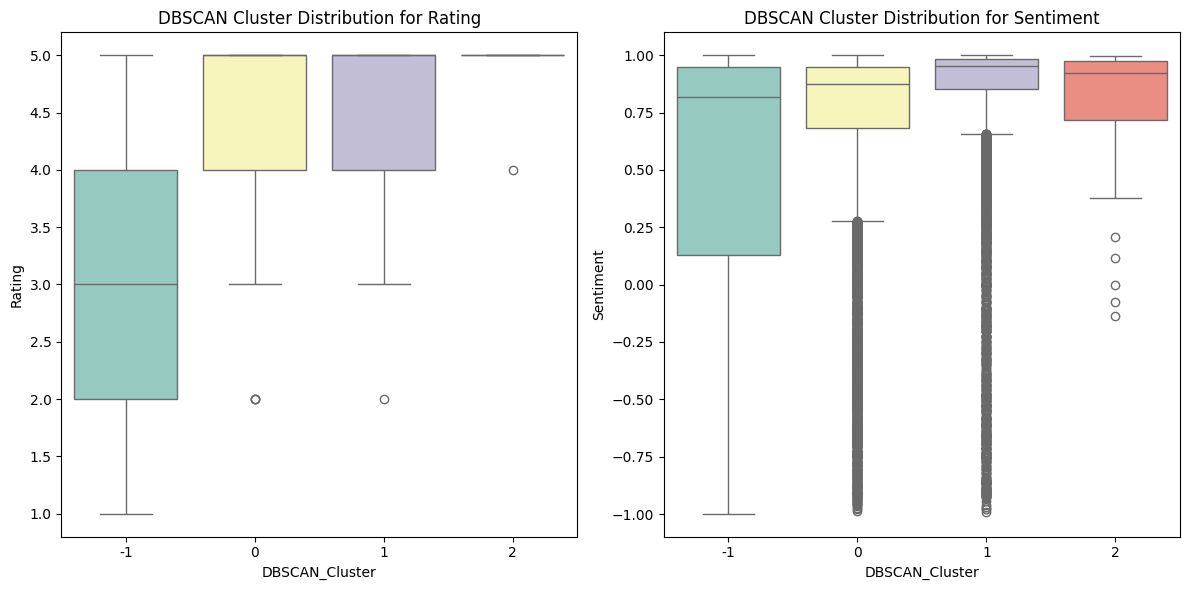

DBSCAN Cluster Descriptive Statistics:

                 Rating                                               \
                  count      mean       std  min  25%  50%  75%  max   
DBSCAN_Cluster                                                         
-1              12590.0  3.186577  1.195110  1.0  2.0  3.0  4.0  5.0   
 0              15394.0  4.707289  0.489681  2.0  4.0  5.0  5.0  5.0   
 1              12091.0  4.703085  0.491287  2.0  4.0  5.0  5.0  5.0   
 2                 92.0  4.989130  0.104257  4.0  5.0  5.0  5.0  5.0   

               Sentiment            ...                    Month            \
                   count      mean  ...     75%     max    count      mean   
DBSCAN_Cluster                      ...                                      
-1               12590.0  0.472873  ...  0.9488  0.9997  12590.0  6.559333   
 0               15394.0  0.727984  ...  0.9496  0.9991  15394.0  6.933416   
 1               12091.0  0.840216  ...  0.9838  0.9999  12091.0 

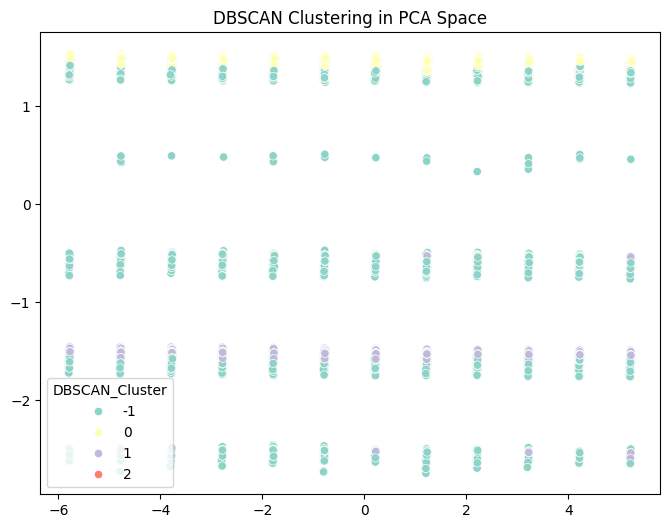

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


df_dbscan = df_all.copy()

df_dbscan['Visit_Type'] = df_dbscan['Visit_Type'].astype('category').cat.codes
df_dbscan['Continent'] = df_dbscan['Continent'].astype('category').cat.codes
features = ['Rating', 'Sentiment', 'Month', 'Visit_Type', 'Continent']

dbscan = DBSCAN(eps=1, min_samples=100)  
df_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(df_dbscan[features])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Rating')

plt.subplot(1, 2, 2)
sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

# Check the DBSCAN cluster distribution
dbscan_stats = df_dbscan.groupby('DBSCAN_Cluster')[['Rating', 'Sentiment', 'Month']].describe()

# Show the DBSCAN stats for each cluster
print("DBSCAN Cluster Descriptive Statistics:\n")
print(dbscan_stats)

# Visualizing DBSCAN clusters in PCA space
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_dbscan[features])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_dbscan['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering in PCA Space')
plt.show()


Cluster -1 (Noise/Outliers)

These points do not fit into any cluster's density, but these reviews aren't necessarily good or bad, but rather unusual combinations of the features that did not meet any of the other density threshold. This group might contain visitors from less common months or continent, or with a combination of moderate rating and sentiment that places them outside the denser regions of the data. 

Cluster 0 (Moderate Satisfaction)
Demographics (Hypothetical)
Families, couples, or regular travelers who look for a reliable, comfortable experience.
Likely a diverse age range, but share a preference for consistent quality.

Behavioral Attributes
Rating: High average (4.71), fairly close to 5.
Sentiment: Positive (0.73), indicating mostly favorable comments.
Timing: Average month ~6.93, suggesting they favor summer visits (June/July).

Preference-Based Insights
Appreciate a well-rounded, reliable experience (good service, clean facilities).
May be open to slight up-sells if they see clear value.
Not as vocal or enthusiastic as Cluster 1, but still content and likely to return.

Actionable Insights
Maintain Quality: Focus on consistency in service, room quality, and dining experiences.
Upselling Opportunities: Offer add-ons (e.g., tours, spa packages) that enhance the experience without risking dissatisfaction.
Retention Programs: Introduce loyalty or membership perks to convert them into repeat customers.

Cluster 1 (High Satisfaction)
Demographics (Hypothetical)
Possibly more experienced travelers or those loyal to the brand.
Could be mid- to higher-income individuals who value excellent service and are willing to pay for it.

Behavioral Attributes
Rating: 4.70—nearly identical to Cluster 0, but with a slightly broader distribution.
Sentiment: 0.84, the highest among all clusters, indicating very positive written feedback.
Timing: Average month ~6.84 (also around June/July), similar to Cluster 0.

Preference-Based Insights
Value the intangible aspects of a stay (personalized service, brand recognition, loyalty benefits).
More likely to leave detailed, positive reviews or recommend to friends/family.

Actionable Insights
Referral & Ambassador Programs: Encourage them to share their positive experiences on social media or review platforms.
Personalization: Recognize repeat visits with personalized welcomes or exclusive perks.
Community Building: Invite them to loyalty clubs or events where they can connect with other loyal customers.

Cluster 2 (Extremely Satisfied)
Demographics (Hypothetical)
Could be VIPs, premium travelers, or a specialized segment (e.g., event attendees, honeymooners).
Possibly smaller groups or individuals traveling for a unique occasion.

Behavioral Attributes
Count: Only 92, making this the smallest cluster.
Rating: 4.99, nearly perfect. Standard deviation is extremely low (~0.10).
Sentiment: 0.80, also quite high (close to Cluster 1).
Timing: Average month ~1.01, indicating January visits—possibly tied to holiday or New Year’s events.

Preference-Based Insights
They consistently have an outstanding experience (almost always 5-star reviews).
Likely highly motivated by special occasions, unique offerings, or seasonal events.

Actionable Insights
Exclusive Experiences: Provide VIP treatment, early access, or premium event invitations.
Leverage Seasonality: If these are holiday guests, create special New Year’s packages or promotions to keep them returning.
High-Touch Service: Personalized communication, follow-up thank-you notes, or direct phone calls to build loyalty.

Overall Takeaways
Retain & Delight Cluster 0
Keep service consistent, offer moderate upsells, encourage loyalty sign-ups.

Empower Cluster 1
Tap into their enthusiasm with referral programs, personalized perks, and brand advocacy.

Celebrate Cluster 2
Provide ultra-personalized experiences, highlight seasonal or exclusive events, and maintain top-notch service for this niche group.

KMeans

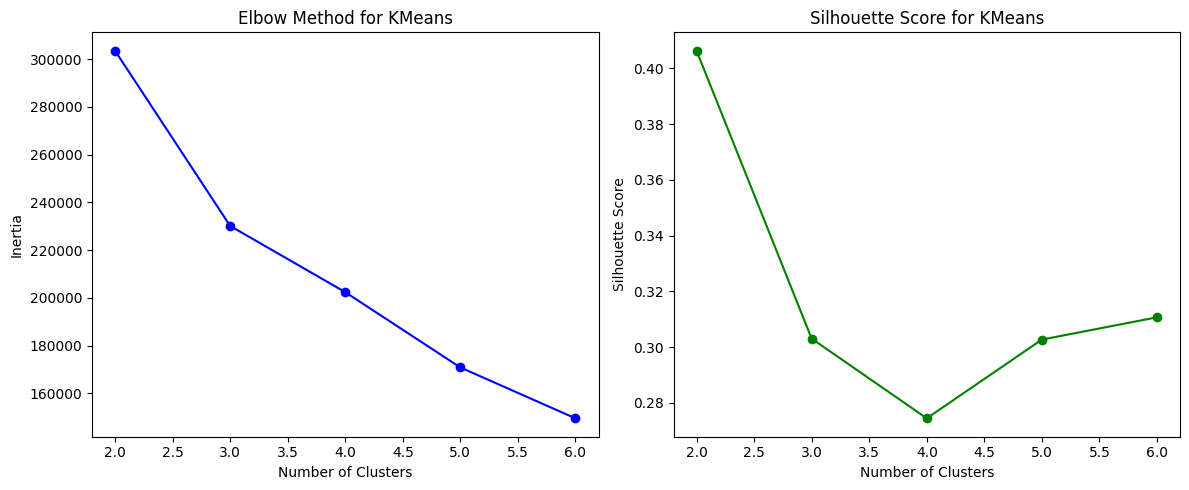

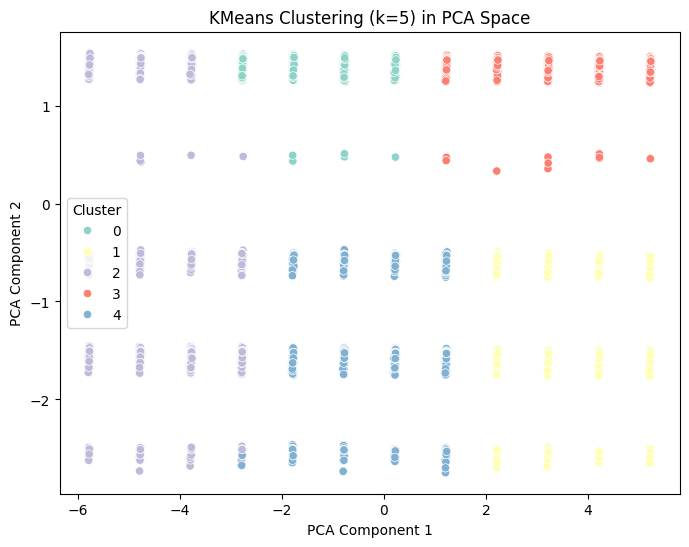

C:\Users\angsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


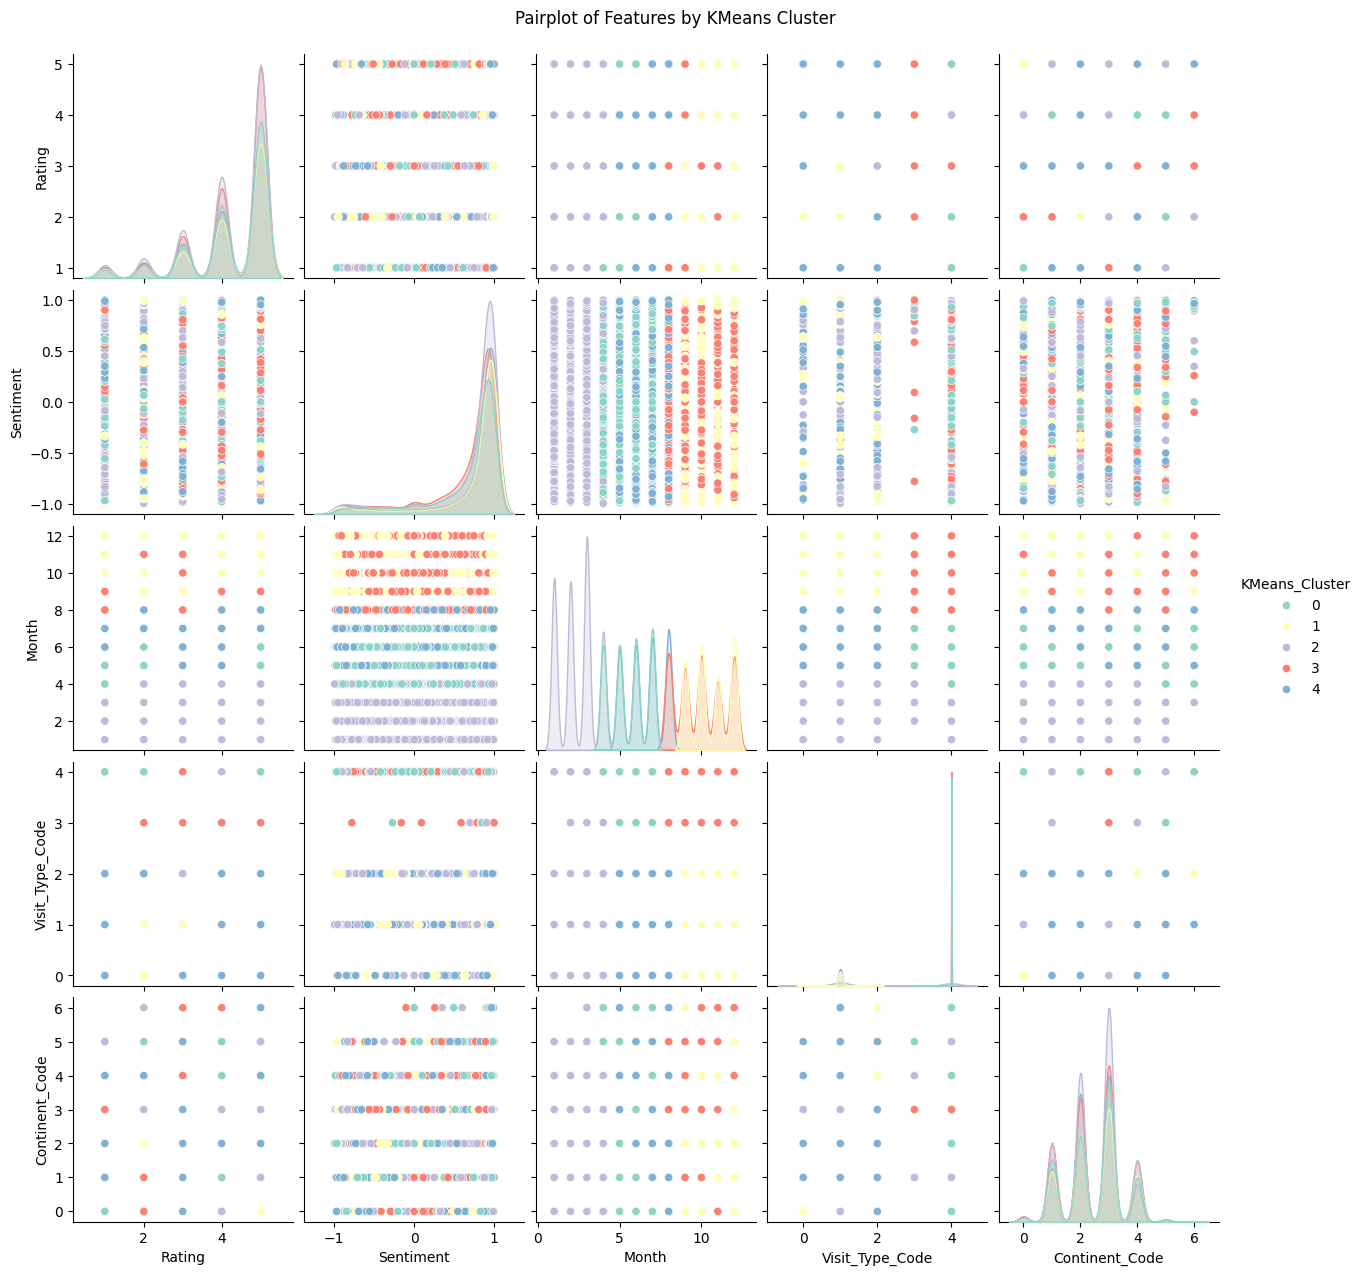

KMeans Cluster Descriptive Statistics:

                Rating                                              Sentiment  \
                 count      mean       std  min  25%  50%  75%  max     count   
KMeans_Cluster                                                                  
0               7370.0  4.250204  1.025302  1.0  4.0  5.0  5.0  5.0    7370.0   
1               6623.0  4.238714  1.070710  1.0  4.0  5.0  5.0  5.0    6623.0   
2               9875.0  4.220759  1.051189  1.0  4.0  5.0  5.0  5.0    9875.0   
3               8964.0  4.293396  1.007634  1.0  4.0  5.0  5.0  5.0    8964.0   
4               7335.0  4.136878  1.114557  1.0  4.0  5.0  5.0  5.0    7335.0   

                          ... Visit_Type_Code      Continent_Code            \
                    mean  ...             75%  max          count      mean   
KMeans_Cluster            ...                                                 
0               0.640273  ...             4.0  4.0         7370.0  2.48724

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


df_km = df_all.copy()
df_km['Visit_Type_Code'] = df_km['Visit_Type'].astype('category').cat.codes
df_km['Continent_Code'] = df_km['Continent'].astype('category').cat.codes
features = ['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']
X = df_km[features]

inertia = []
sil_scores = []
k_range = range(2, 7) 

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Opitmal K Based on the plots
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_km['KMeans_Cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_km['KMeans_Cluster'], palette='Set3')
plt.title(f'KMeans Clustering (k={optimal_k}) in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

sns.pairplot(df_km, vars=features, hue='KMeans_Cluster', palette='Set3')
plt.suptitle('Pairplot of Features by KMeans Cluster', y=1.02)
plt.show()

cluster_profile = df_km.groupby('KMeans_Cluster')[['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']].describe()
print("KMeans Cluster Descriptive Statistics:\n")
print(cluster_profile)


Cluster 0
Rating: ~4.25 (High)
Sentiment: ~0.64 (Moderate)
Month: ~5.56 (Late Spring/Early Summer: April–July range)

Interpretation:
These guests are generally satisfied (mean rating >4.0).
Text feedback is moderately positive but not as enthusiastic as some other clusters.
They tend to visit in late spring to early summer (April–July).

Actionable Insights:
Early-Summer Campaigns: Offer promotions or special packages for May–June travelers to reinforce their positive experience.
Nudge Higher Ratings: Since sentiment is a bit lower than expected for a 4.25 rating, consider small service improvements or better communication to convert “good” experiences into “great” ones.
Preemptive Support: Provide details about peak-season amenities, local events, or weather tips to manage expectations and reduce potential dissatisfaction.

Cluster 1
Rating: ~4.24 (High)
Sentiment: ~0.73 (High)
Month: ~10.55 (Fall to Early Winter: September–December range)

Interpretation:
Similar overall rating to Cluster 0, but sentiment is higher, indicating more positive or enthusiastic text reviews.
Visits concentrate in the fall/holiday season.

Actionable Insights:
Holiday & Festive Promotions: Leverage their higher sentiment around end-of-year festivities—e.g., Christmas, New Year’s, or autumn events.
Encourage Advocacy: Their strong sentiment suggests they’re more likely to share positive feedback on social media or review sites. Offer referral bonuses or loyalty points for reviews.
Seasonal Upsells: Focus on holiday-themed experiences (e.g., special dinners, holiday shows) that match their likely travel window.


Cluster 2
Rating: ~4.22 (Moderately High)
Sentiment: ~0.69 (Moderate-High)
Month: ~2.41 (Winter/Early Spring: January–April range)

Interpretation:
The largest cluster (9,875 guests), with decent ratings and sentiment.
Primarily traveling in winter or early spring.
Slightly lower average rating than Clusters 0 and 1, but still above 4.0.

Actionable Insights:
Winter Specials: Offer packages tailored for the January–March period (e.g., Valentine’s getaways, spring break deals).
Boost Engagement: If they have moderate sentiment, consider sending personalized follow-up surveys or loyalty offers to maintain goodwill.
Volume Advantage: As the biggest group, even small improvements in their experience can significantly impact overall ratings and revenue.

Cluster 3
Rating: ~4.29 (Second-highest)
Sentiment: ~0.64 (Similar to Cluster 0)
Month: ~9.95 (Late Summer to Fall: August–December)

Interpretation:
Very close to Cluster 0 in sentiment, but a slightly higher rating (4.29 vs. 4.25).
They visit in late summer through fall, peaking around September/October.
Somewhat paradoxical that sentiment is not higher despite a good rating, suggesting they might rate well but not elaborate positively in text.

Actionable Insights:
Bridge the Rating–Sentiment Gap: Investigate why text sentiment is moderate even though star ratings are high. Possibly these guests are concise or reserved in written feedback.
Focus on Seasonal Events: Many destinations have major events in August–November (e.g., fall festivals). Promote relevant experiences to maintain strong satisfaction.
Targeted Surveys or Interviews: To understand what they like most (they do rate you highly) and how to convert that into more enthusiastic word-of-mouth.

Cluster 4
Rating: ~4.14 (Lowest among the five, but still above 4.0)
Sentiment: ~0.72 (Fairly high text positivity)
Month: ~6.57 (Spring to Summer: April–August)

Interpretation:
A curious mix: lowest average rating yet relatively high sentiment (comparable to Cluster 1’s 0.73).
Visits occur in the late spring/summer window.
Possibly these guests are warm in their feedback but with specific complaints that lower their final rating.

Actionable Insights:
Investigate Rating Discrepancies: If they speak positively (sentiment ~0.72) but still give 4.14 on average, identify specific service gaps. Maybe a critical amenity or logistical issue.
Summer Experience Enhancements: Offer improved check-in processes, better air-conditioning, or summer activity bundles to address potential friction points.
Encourage Detailed Feedback: Their textual sentiment is positive; prompting them to share more detailed reviews might reveal easy fixes that could raise their ratings to match their sentiment.

Overall

Seasonal Patterns
Cluster 2 (largest) is a winter–early spring crowd, while Clusters 0 and 4 favor spring–summer, and Clusters 1 and 3 lean toward fall–winter.
Align promotions, events, and staffing levels with each cluster’s travel window.

Rating vs. Sentiment
Most clusters have 4.1–4.3 average ratings, but sentiment scores vary from ~0.64 to ~0.73.
Cluster 1 has a higher sentiment (0.73) but the same rating as 0 (~4.24–4.25).
Cluster 4 shows the lowest rating (4.14) yet fairly high sentiment (0.72), suggesting a mismatch worth investigating.

Actionable Insights
Cluster 0 & 3: Similar moderate sentiment (~0.64) but decent ratings. They might be short, matter-of-fact reviewers who rate well but don’t gush in text.
Cluster 1: Strong sentiment and good ratings, especially during the fall–winter season—ideal for holiday or end-of-year marketing.
Cluster 2: Largest group, with a winter/early-spring focus. Even small improvements can yield big gains in overall ratings and revenue.
Cluster 4: Needs attention to close the gap between positive text feedback and lower star ratings, especially during peak summer months.


DROPPING ALL VISIT_TYPE = UNKNOWN (IGNORE FOR NOW)

C:\Users\angsp\AppData\Local\Temp\ipykernel_7864\4239621001.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_7864\4239621001.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")


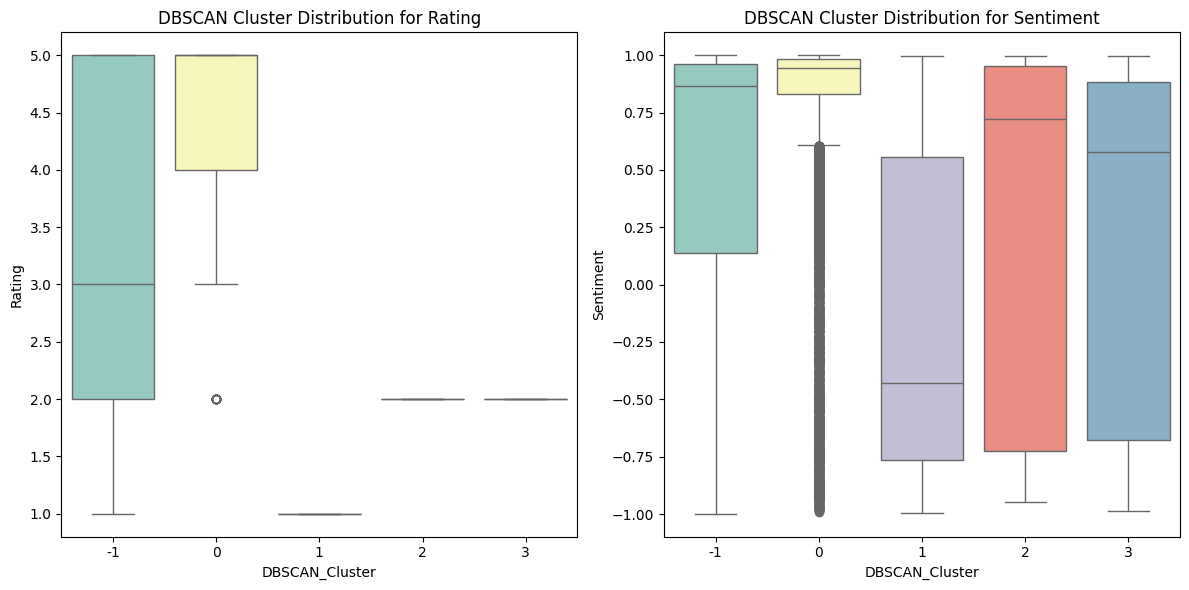

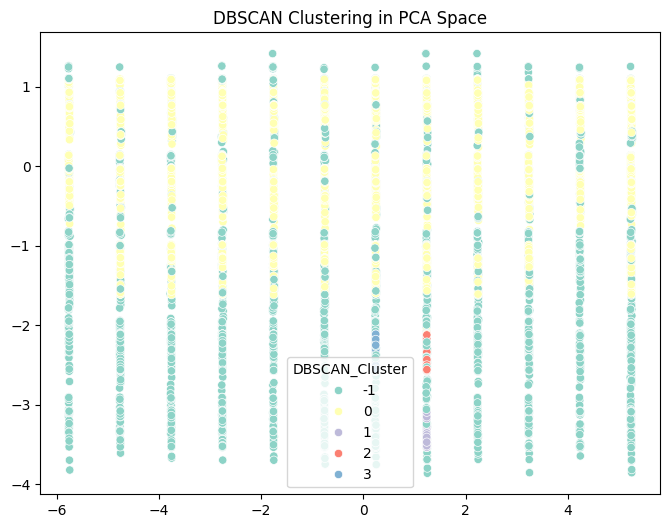

DBSCAN Cluster Descriptive Statistics (Dropping Unknown Visit_Type):

                 Rating                                               \
                  count      mean       std  min  25%  50%  75%  max   
DBSCAN_Cluster                                                         
-1               4502.0  3.143714  1.411384  1.0  2.0  3.0  5.0  5.0   
 0              15104.0  4.528337  0.662154  2.0  4.0  5.0  5.0  5.0   
 1                 65.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 2                 58.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   
 3                 49.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   

               Sentiment            ... Visit_Type_Code      Continent_Code  \
                   count      mean  ...             75%  max          count   
DBSCAN_Cluster                      ...                                       
-1                4502.0  0.473332  ...             2.0  3.0         4502.0   
 0               15104.0  0.811568  .

In [ ]:
df_dbscan = df_all.copy()

df_dbscan = df_dbscan[df_dbscan['Visit_Type'] != 'Unknown'].copy()

df_dbscan['Visit_Type_Code'] = df_dbscan['Visit_Type'].astype('category').cat.codes
df_dbscan['Continent_Code'] = df_dbscan['Continent'].astype('category').cat.codes

features = ['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']
X = df_dbscan[features]

dbscan = DBSCAN(eps=1, min_samples=45) 
df_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualize DBSCAN clustering (Boxplots)
plt.figure(figsize=(12, 6))

# Rating distribution by DBSCAN cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Rating')

# Sentiment distribution by DBSCAN cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

# DBSCAN in PCA space
pca = PCA(n_components=2)
pca_components_dbscan = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components_dbscan[:, 0], y=pca_components_dbscan[:, 1], 
                hue=df_dbscan['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering in PCA Space')
plt.show()

dbscan_stats = df_dbscan.groupby('DBSCAN_Cluster')[['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']].describe()
print("DBSCAN Cluster Descriptive Statistics (Dropping Unknown Visit_Type):\n")
print(dbscan_stats)

Hard to tell if there is any significant improvement (although seems to worsen) in the clustering. Will not make analysis but leave it here as archive